# World Happiness Report Project

### Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happiness people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.



    The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

    The Dystopia Residual is already provided in the dataset. 

    If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =15
plt.rcParams['font.size']=15


#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='#E0B0FF'


## Import Dataset

In [2]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
happiness=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
#Lets check head of the DataFrame retrieved using happiness.head()
happiness.head(6)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [4]:
#Lets check tail of the DataFrame retrieved using happiness.tail()
happiness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

# Exploratory Data Analysis (EDA)

## Non-Graphical Analysis

In [5]:
#Let's check the dimensions of the data set using shape 
happiness.shape

(158, 12)

The Dataset contains 158 rows and 12 columns containing various values corresponding to the data

In [6]:
#Let's check the names of the Columns for later usage
happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Above Columns function identifies the columns and we can find that the happiness score of each country can be grouped by the particular region 

Every single character or column can be compared against the Country onnly considering the region

In [7]:
#checking the dimensions of the internet 
happiness.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

With this we could convert the DataFrame Columns to the List and checked

In [8]:
#Let's check the data types of the columns
happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Except Country and Region, all the others are under Numerical data only, and are of FLOAT data type.
so, for further analysis we can consider these columns and plot them by leaving country, region and happiness rank also.

### Checking the Null Values

In [9]:
#Checking the Null Values
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can observe that there are no null values in any of the columns in the gievn data set

In [10]:
#Check the Sum of NULL Values in the total DataFrame
happiness.isnull().sum().sum()

0

Once Again we can make confirmation that, in the entire data set, there are no single NULL values. 

Which reduces our work to replace them and treating them.

#### Get the Complete Information about Dataset

In [11]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

We have already looked at the information and NULL values earlier and this is a simple way to reiterate and check the information clearly.

We can see that, there are 9 columns of the features are floats, 1 is of integers and 2 are objects. The dataset has 158 values and 11 features + the target variable (Region). Memory Size is about 14.9+ KB

<Axes: >

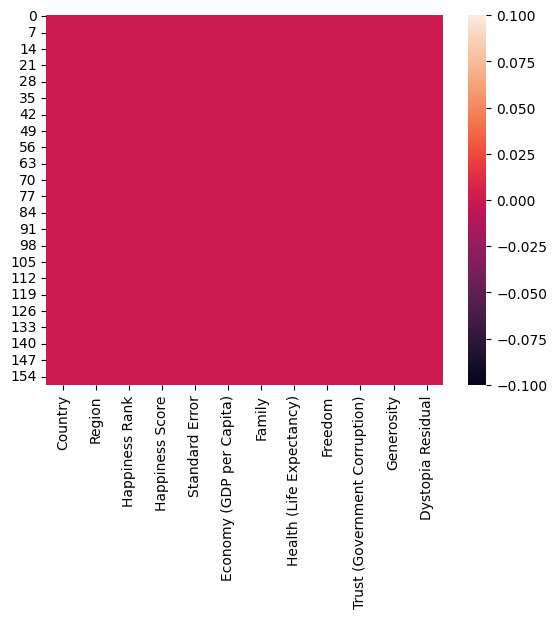

In [12]:
sns.heatmap(happiness.isnull())

The Heatmap shows very clearly tht, there are no NULL Values in the given data set

#### Let's check the unique values and all the information in each column

In [13]:
#Gives Unique Values
happiness['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [14]:
#Gives Unique Values
happiness['Region'].nunique()

10

In [15]:
#Checking the value counts of each Column
for i in happiness.columns:
    print(happiness[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

From this method we can come back to following conclusions:
   1)  Country column has all 158 values as Unique since each country is different
    
   2) There are 10 different regions are identified, where sub saharan Africa region has highest number of coutries (40) and Australia and New Zealand has only two (2)
   
   3) Based on these data we will do the analysis

In [16]:
#Let's implement describe to return the description of the data in the DataFrame
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Since, the describe() method is used to return the description of the data in the given Dataset, we use it to find out the description of Numerical data which gives the final conclusion and information as follows in the each column

1) COUNT: The Counts of all coulmns are same, which shows no data is missed.

2) MEAN: The Mean Value is greater than the Median(50%) in standard error, Trust, Generosity and Dystopia so right skewed 

3) mean is lesser than median in other columns and we treat them accordingly

4) There is a large variation in mean and 75% in Happiness Rank, score, Economy, Family, Health. so there's a possibility of outliers, which we will handle later.

5) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

#### We can see what data is actually missing:

In [17]:
total = happiness.isnull().sum().sort_values(ascending=False)
percent_1 = happiness.isnull().sum()/happiness.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Country,0,0.0
Region,0,0.0
Happiness Rank,0,0.0
Happiness Score,0,0.0
Standard Error,0,0.0


A Sample represetation to see how much of the data is actually missing. Since there is no data is missing, it's 0%

#### Finging unique values for each column

In [18]:
# recognizing which column is continuous and which is categorical
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
happiness.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

We can see that almost all columns have 158 unique values, which is equal to the total number of elements or columns in the data set.

Excecpt Region has 10 Uniqe Values. SO, let's consider Region as our Taarget consideration and plot some of the graphs and do the analysis.

### Let's Rename some of the column names for easy plotting

In [19]:
data_columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

In [20]:
happiness = happiness[data_columns].copy()

In [21]:
happiness_df= happiness.rename({'Country':'Country', 'Region':'Region', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score','Standard Error':'Standard_Error','Economy (GDP per Capita)':'GDP','Family':'Family', 'Health (Life Expectancy)':'Life_Expectancy', 'Freedom':'Freedom','Trust (Government Corruption)':'Corruption','Generosity':'Generosity','Dystopia Residual':'Dystopia_Residual'}, axis=1)

In [22]:
happiness_df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'GDP', 'Family', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

#### Making new dataframe considering Numerical datatypes for further investigation

In [23]:
happiness_new = happiness[happiness.columns[3:]]
happiness_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Except Country, Region and Happinsee Rank all others are Float data type. So let's keep them into a Dafata Frame and do the analysis

<Axes: xlabel='Region'>

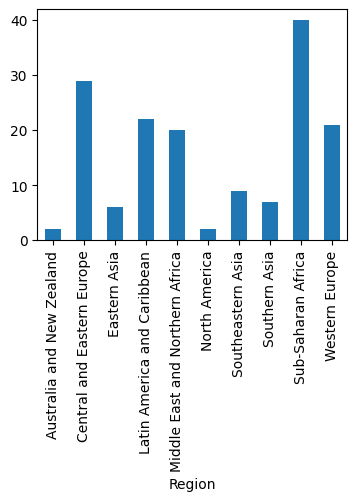

In [24]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
Group_data=happiness.groupby('Region').size()
Group_data.plot(kind='bar', figsize=(4,3))

The Above Graph of Region gives us the count plot interms of Bar graphs.

### Graphical Analysis

Text(0, 0.5, 'GDP per capita')

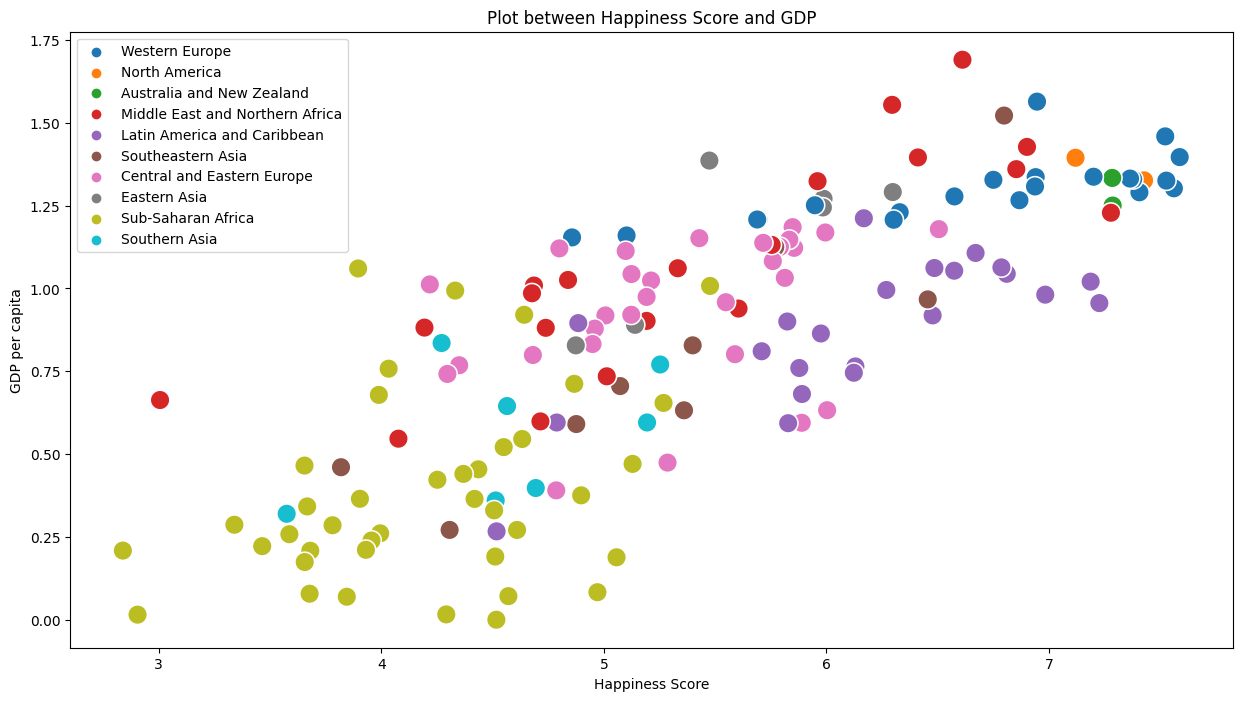

In [25]:
# Let's plot a scatter plot of Happiness Vs Economy (GDP)
plt.rcParams['figure.figsize']=(15,8)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happiness_df.Happiness_Score, y= happiness_df.GDP, hue= happiness_df.Region, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

### Plot PIE Chart to understand the GDP by Region

In [26]:
#First lets create a group for Region to calculate GDP
GDP_region=happiness_df.groupby('Region')['GDP'].sum()
GDP_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP, dtype: float64

we can see sum of GDP for all the countries for different regions

now we are going to plot PIE Chart

Text(0, 0.5, ' ')

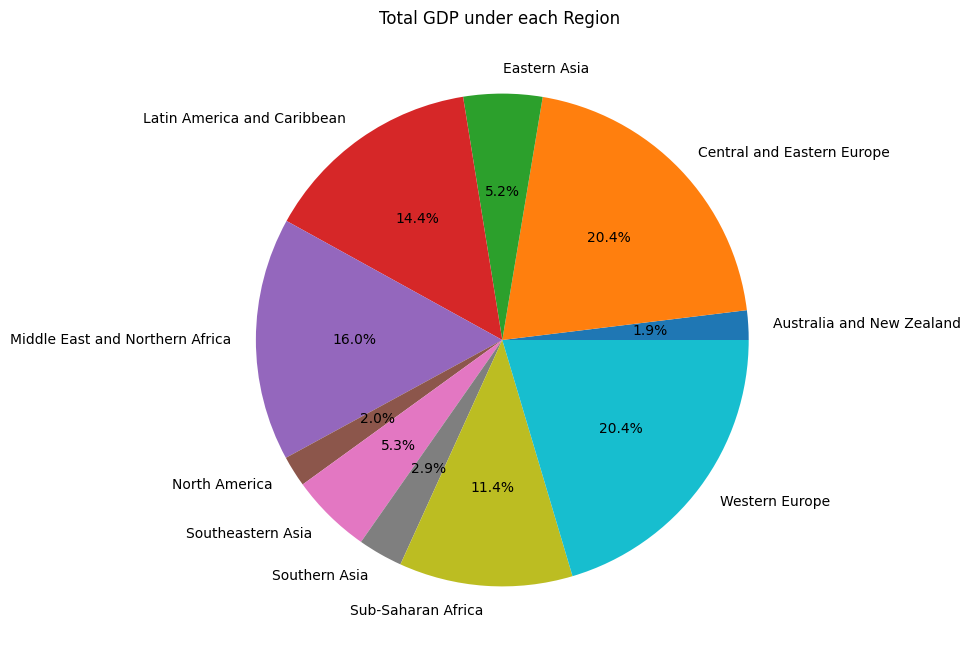

In [27]:
GDP_region.plot.pie(autopct= '%1.1f%%')
plt.title('Total GDP under each Region ')
plt.ylabel(' ')

Here we can seee that, Western Europe is contributing highest GDP, Sub Saharan Africa is contributing 11.4%, North America is contributing only 2.0% since
there are only 2 countries

In [28]:
#Let's count total number of countries in each region
total_countries = happiness_df.groupby('Region')[['Country']].count()
print(total_countries)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


The total number of countires have been listed under each region
which is direcly giving the information regarding the GDP contributed

### Visualize BAR Plot of Corruption in Different Regions

In [29]:
corruption = happiness_df.groupby('Region')[['Corruption']].mean()
corruption

,Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Australia and New Zealand has highest corruption  and Central and Eastern Europe has less corruption

<BarContainer object of 10 artists>

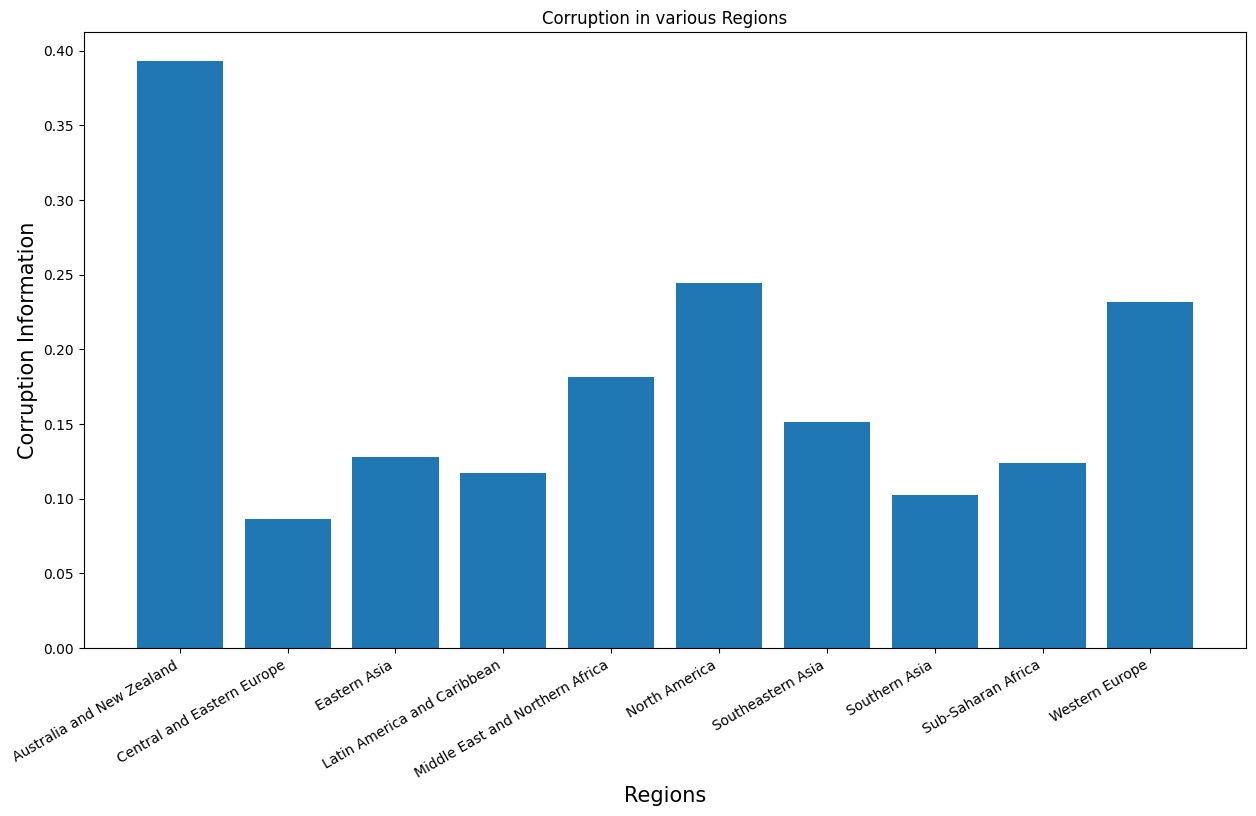

In [30]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Corruption in various Regions')
plt.xlabel('Regions', fontsize='15')
plt.ylabel('Corruption Information', fontsize='15')
plt.xticks(rotation =30, ha='right')
plt.bar(corruption.index,corruption.Corruption)

As per the table we have created, Australia and New Zealand has highest corruption and Central and Eastern Europe has less corruption

#### Life Expectancy of Top 10 and Bottom 10 Happiest Countries

In [31]:
# Top 10 happiest countries
top_10 = happiness_df.head(10)
# BOTTOM 10 happiest countries
bottom_10 = happiness_df.tail(10)

Text(150.22222222222223, 0.5, 'Life Expectancy')

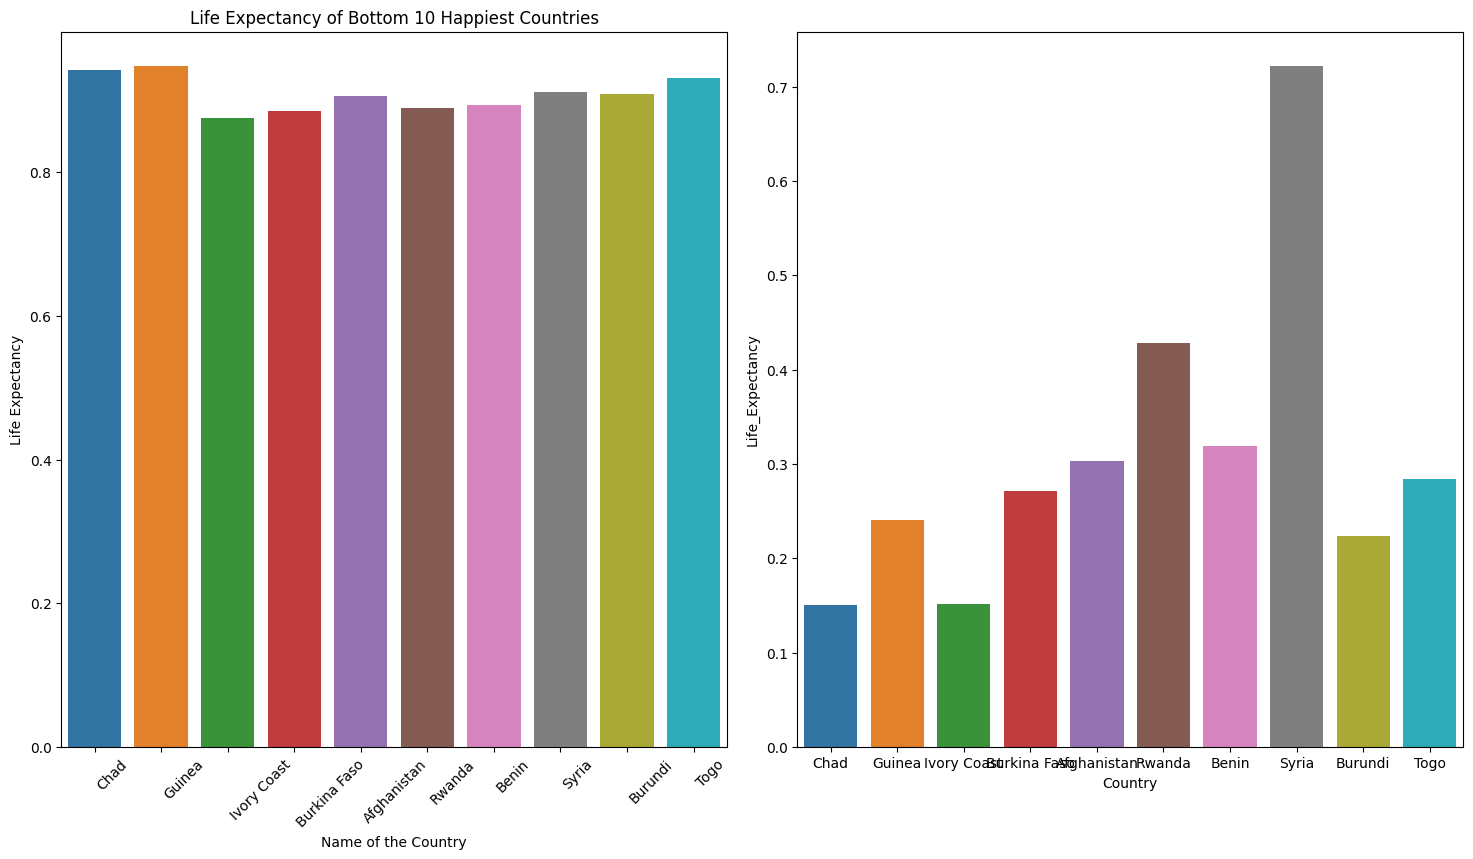

In [32]:
fig, axes =plt.subplots(1,2, figsize=(15,8))
plt.tight_layout(pad=2)
xlabels=top_10.Country
axes[0].set_title('Life Expectancy of Top 10 Happiest Countries')
axes[0].set_xticklabels(xlabels, rotation =45, ha='right')
sns.barplot(x=top_10.Country,y=top_10.Life_Expectancy, ax=axes[0])
axes[0].set_xlabel('Name of the Country')
axes[0].set_ylabel('Life Expectancy')


xlabels=bottom_10.Country
axes[0].set_title('Life Expectancy of Bottom 10 Happiest Countries')
axes[0].set_xticklabels(xlabels, rotation =45, ha='left')
sns.barplot(x=bottom_10.Country,y=bottom_10.Life_Expectancy, ax=axes[1])
axes[0].set_xlabel('Name of the Country')
axes[0].set_ylabel('Life Expectancy')

We can clearly identify that, on an avergae the average life expetancy is aboce 80 years

Bottom happiest COuntries are very less

### Plot between Freddom to make life choices and Happiness Score

Text(0, 0.5, 'Happiness Score by Region')

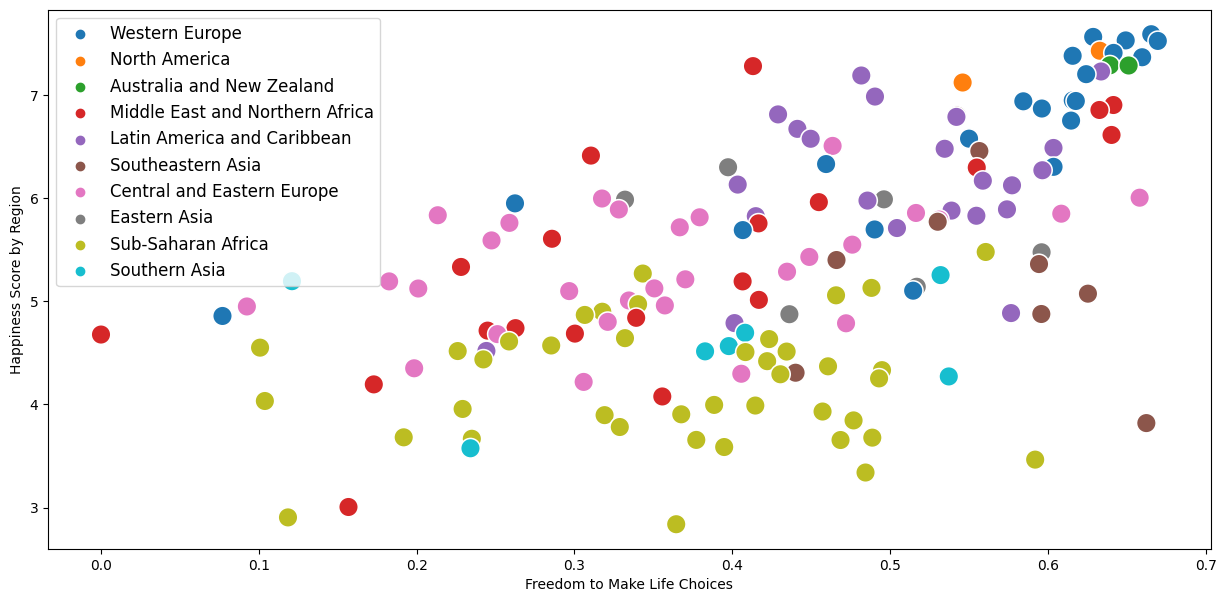

In [33]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happiness_df.Freedom, y=happiness_df.Happiness_Score, hue=happiness_df.Region, s=200)
plt.legend(loc = 'upper left', fontsize=12)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score by Region')


We can see very clearly, for the countries that lie in the Western Europe has high choices and others are 
having less
Specially Happiness Score is less for the countries under the Sub Saharan Region.

#### Top 10 Most Corrupted COuntries

<BarContainer object of 10 artists>

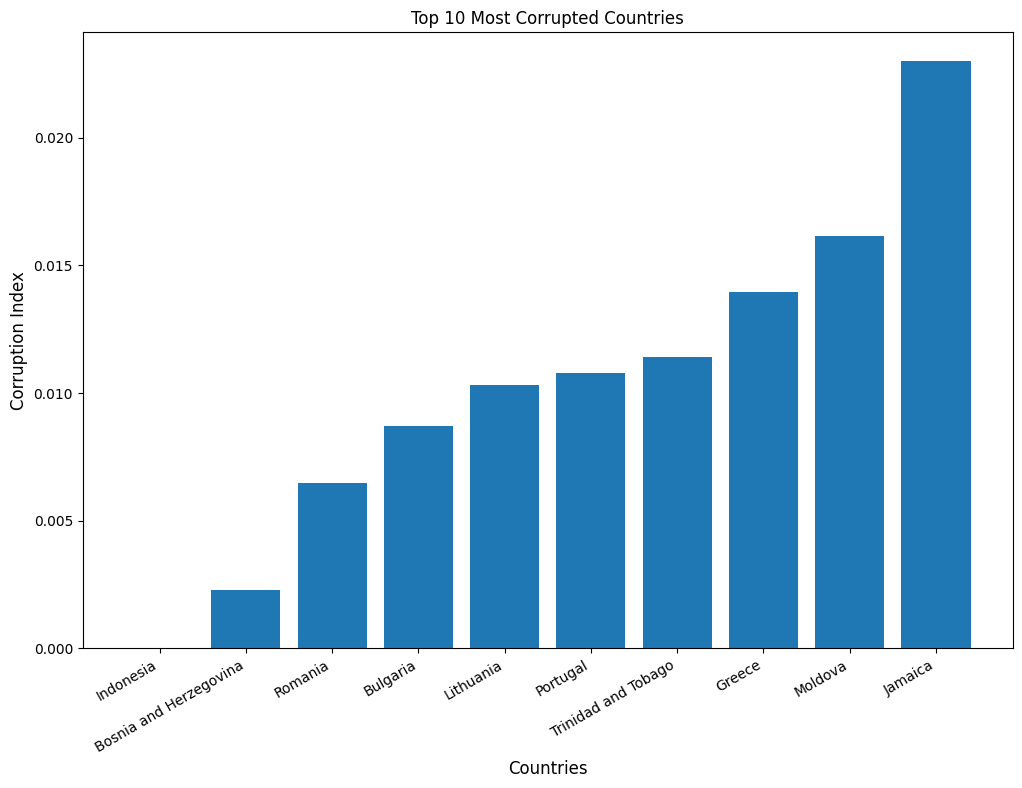

In [34]:
country = happiness_df.sort_values(by='Corruption').head(10)
plt.rcParams['figure.figsize']=(12,8)
plt.title('Top 10 Most Corrupted Countries')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Corruption Index', fontsize=12)
plt.xticks(rotation = 30, ha='right') # ha is Horizontal Alignment
plt.bar(country.Country, country.Corruption)


Indonesia has lowest corruption Index and followed by Bosnia and romania...


if we change head in the place of tail, we get most corrupted countries.

<BarContainer object of 10 artists>

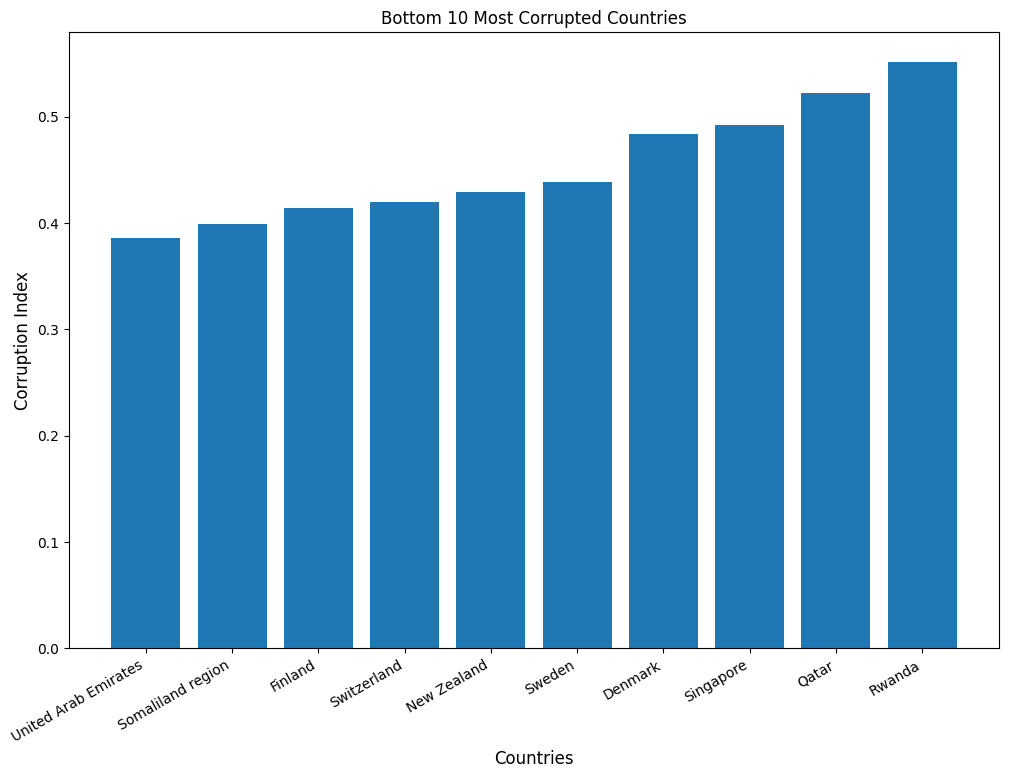

In [35]:
country = happiness_df.sort_values(by='Corruption').tail(10)
plt.rcParams['figure.figsize']=(12,8)
plt.title('Bottom 10 Most Corrupted Countries')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Corruption Index', fontsize=12)
plt.xticks(rotation = 30, ha='right') # ha is Horizontal Alignment
plt.bar(country.Country, country.Corruption)


### Scatter Plot for varying Corruption with Happiness Score

Text(0, 0.5, 'Corruption')

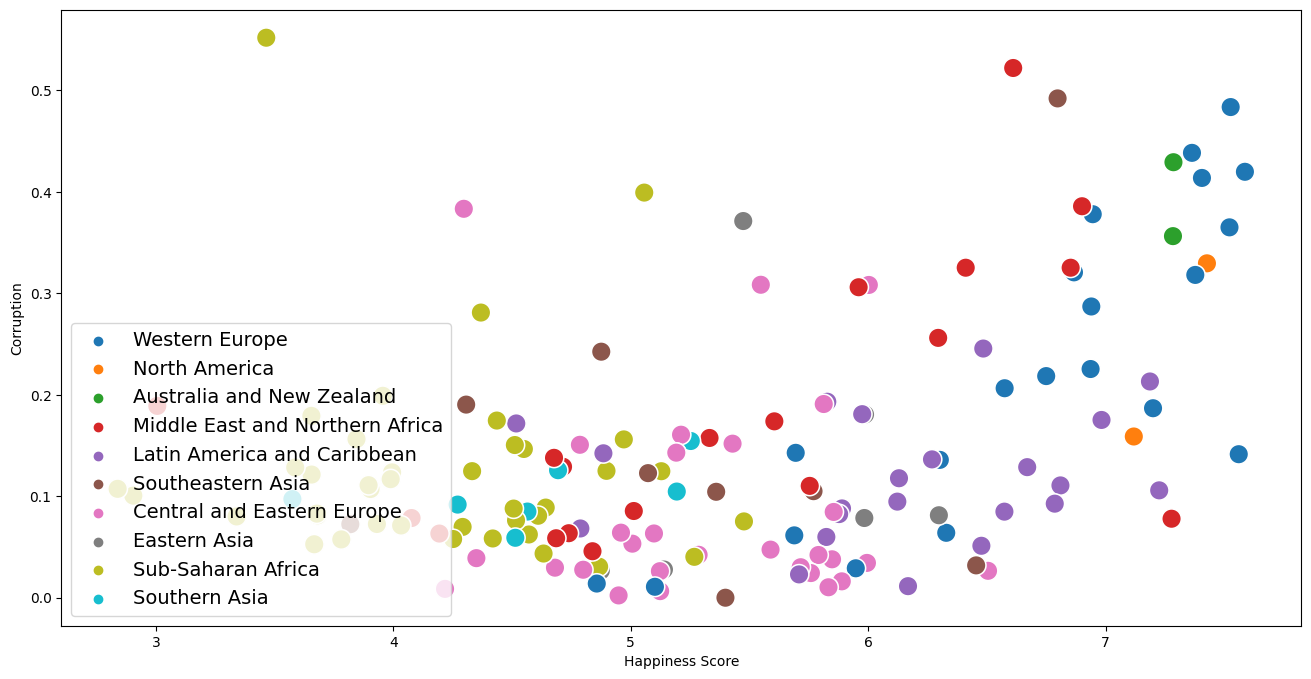

In [36]:
plt.rcParams['figure.figsize']=(16,8)
sns.scatterplot(x=happiness_df.Happiness_Score, y=happiness_df.Corruption, hue=happiness_df.Region, s=200)
plt.legend(loc='lower left', fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

In [37]:
X=happiness_new.drop(columns =['Happiness Score'])
Y=happiness_new['Happiness Score']

#### Skewness detection using distplot and skew()

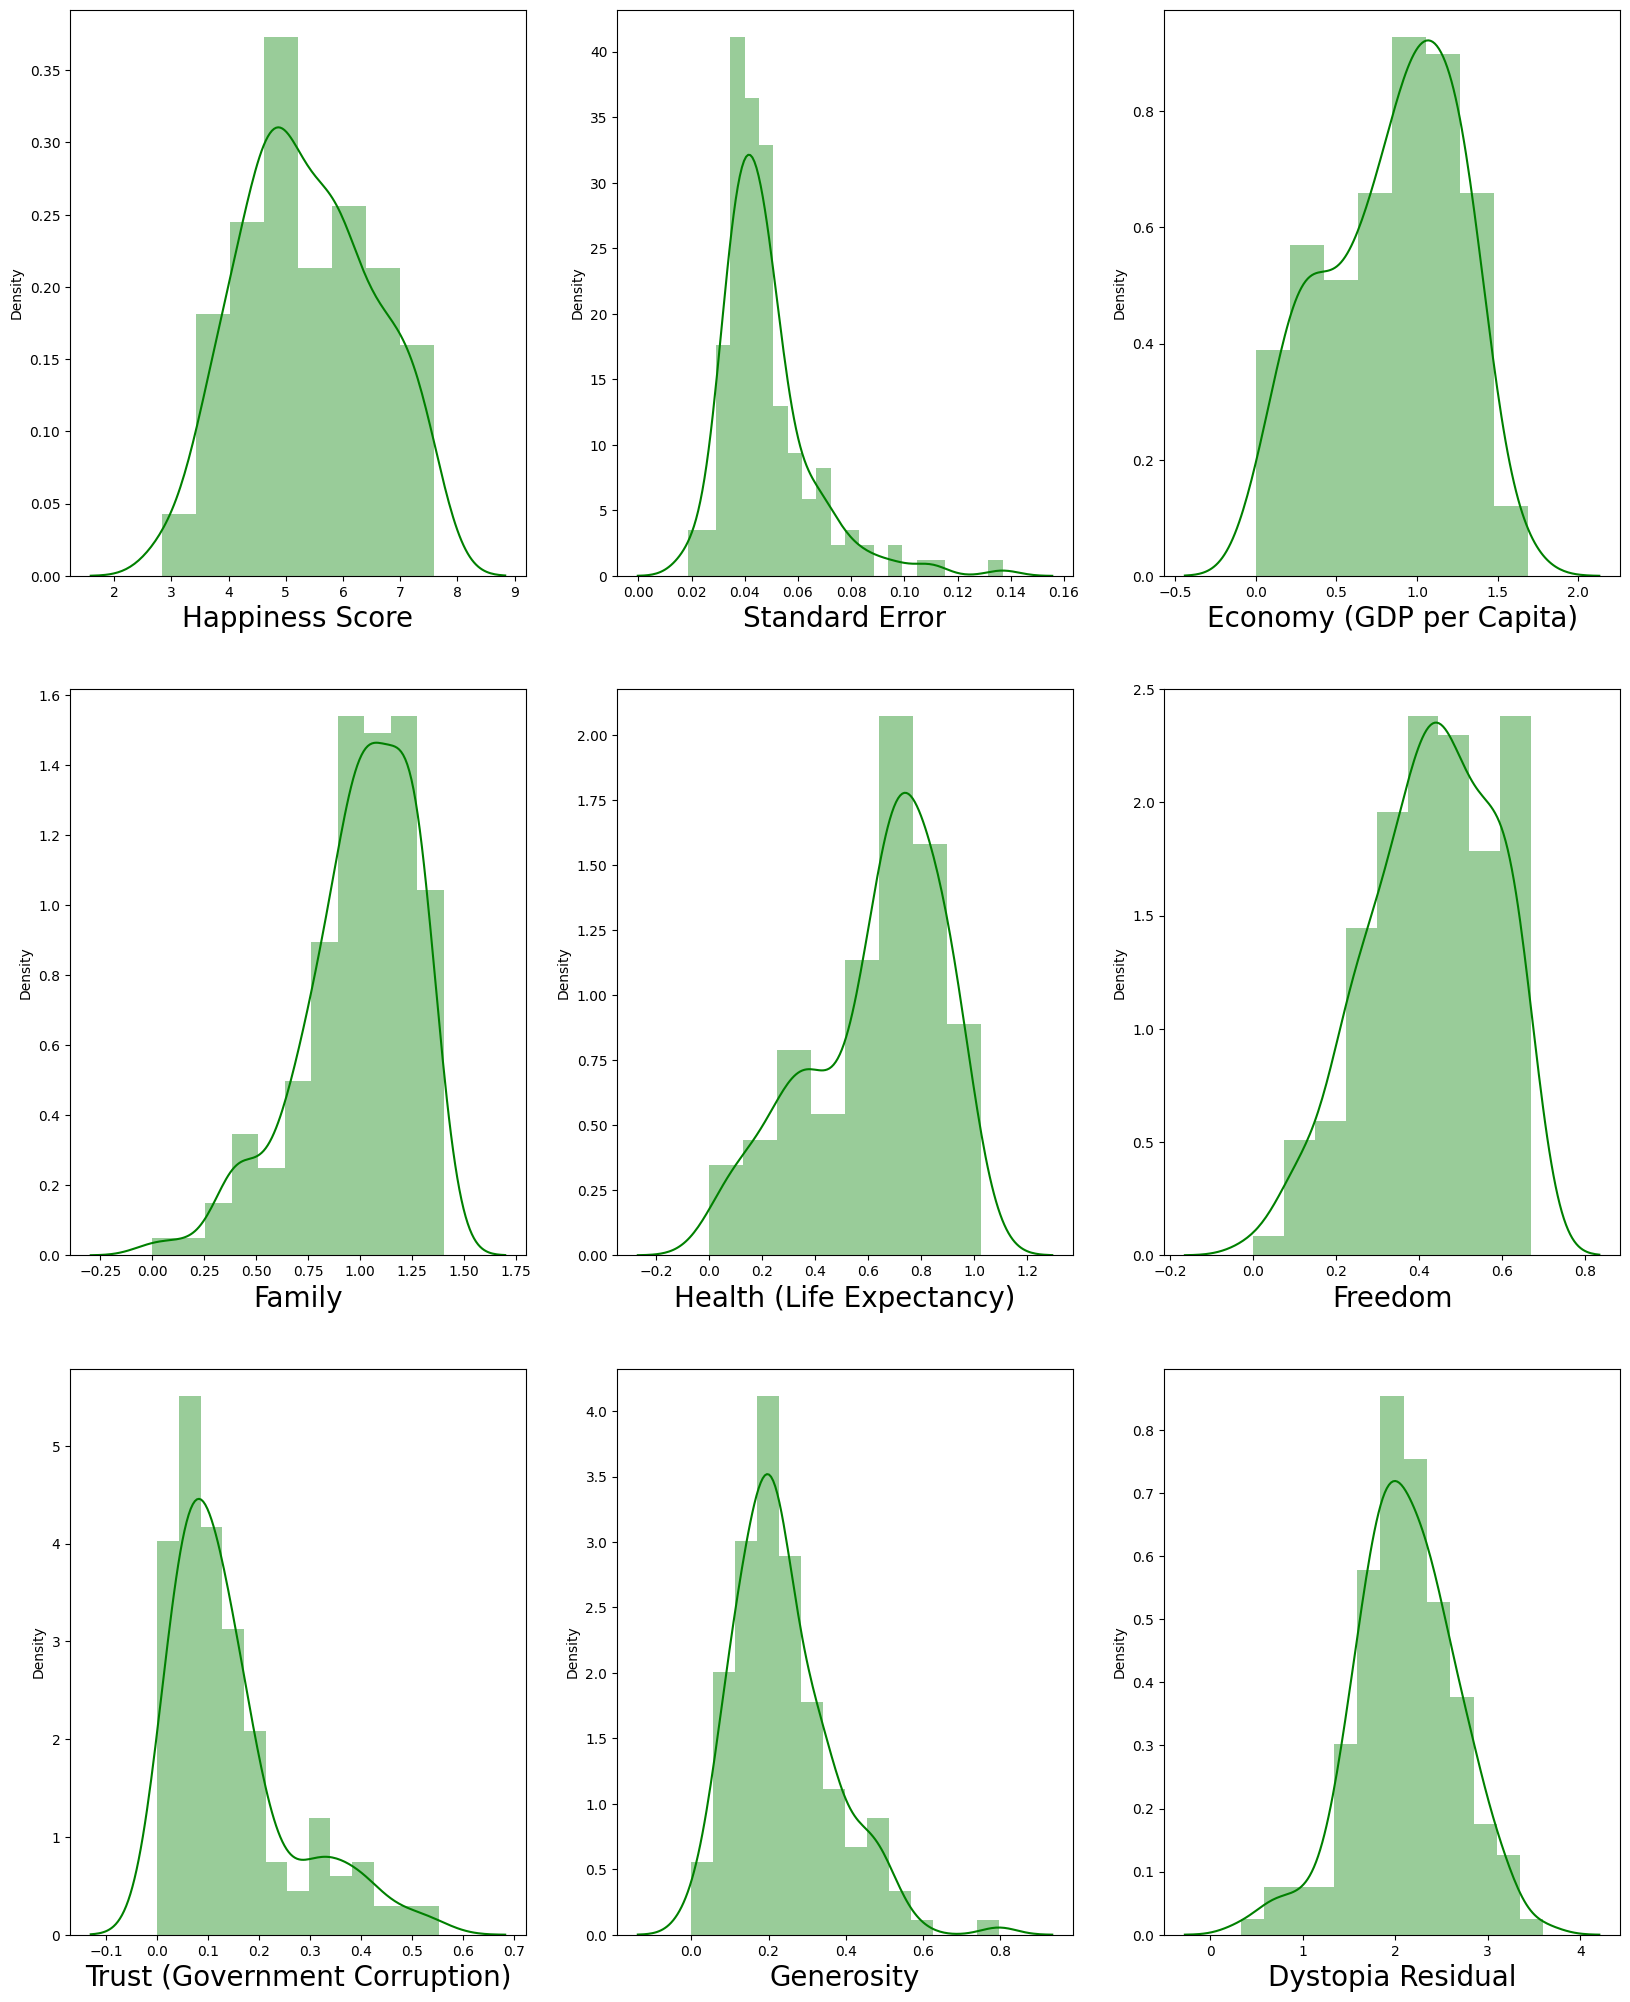

In [38]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in happiness_new:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(happiness_new[column], color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
happiness.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [40]:
from scipy.stats import boxcox
# 0 -> Log transform
# 0.5 -> square root trasform

In [41]:
happiness['Standard Error']=boxcox(happiness['Standard Error'],0)

In [42]:
happiness.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### Multicollinearity using Variance_inflation_factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

In [45]:
# Let check  the Values
vif

,vif,Features
0,7.166167,Standard Error
1,21.759914,Economy (GDP per Capita)
2,25.636995,Family
3,23.090959,Health (Life Expectancy)
4,15.880880,Freedom
5,3.497600,Trust (Government Corruption)
6,5.600094,Generosity
7,12.574726,Dystopia Residual


### Histplot

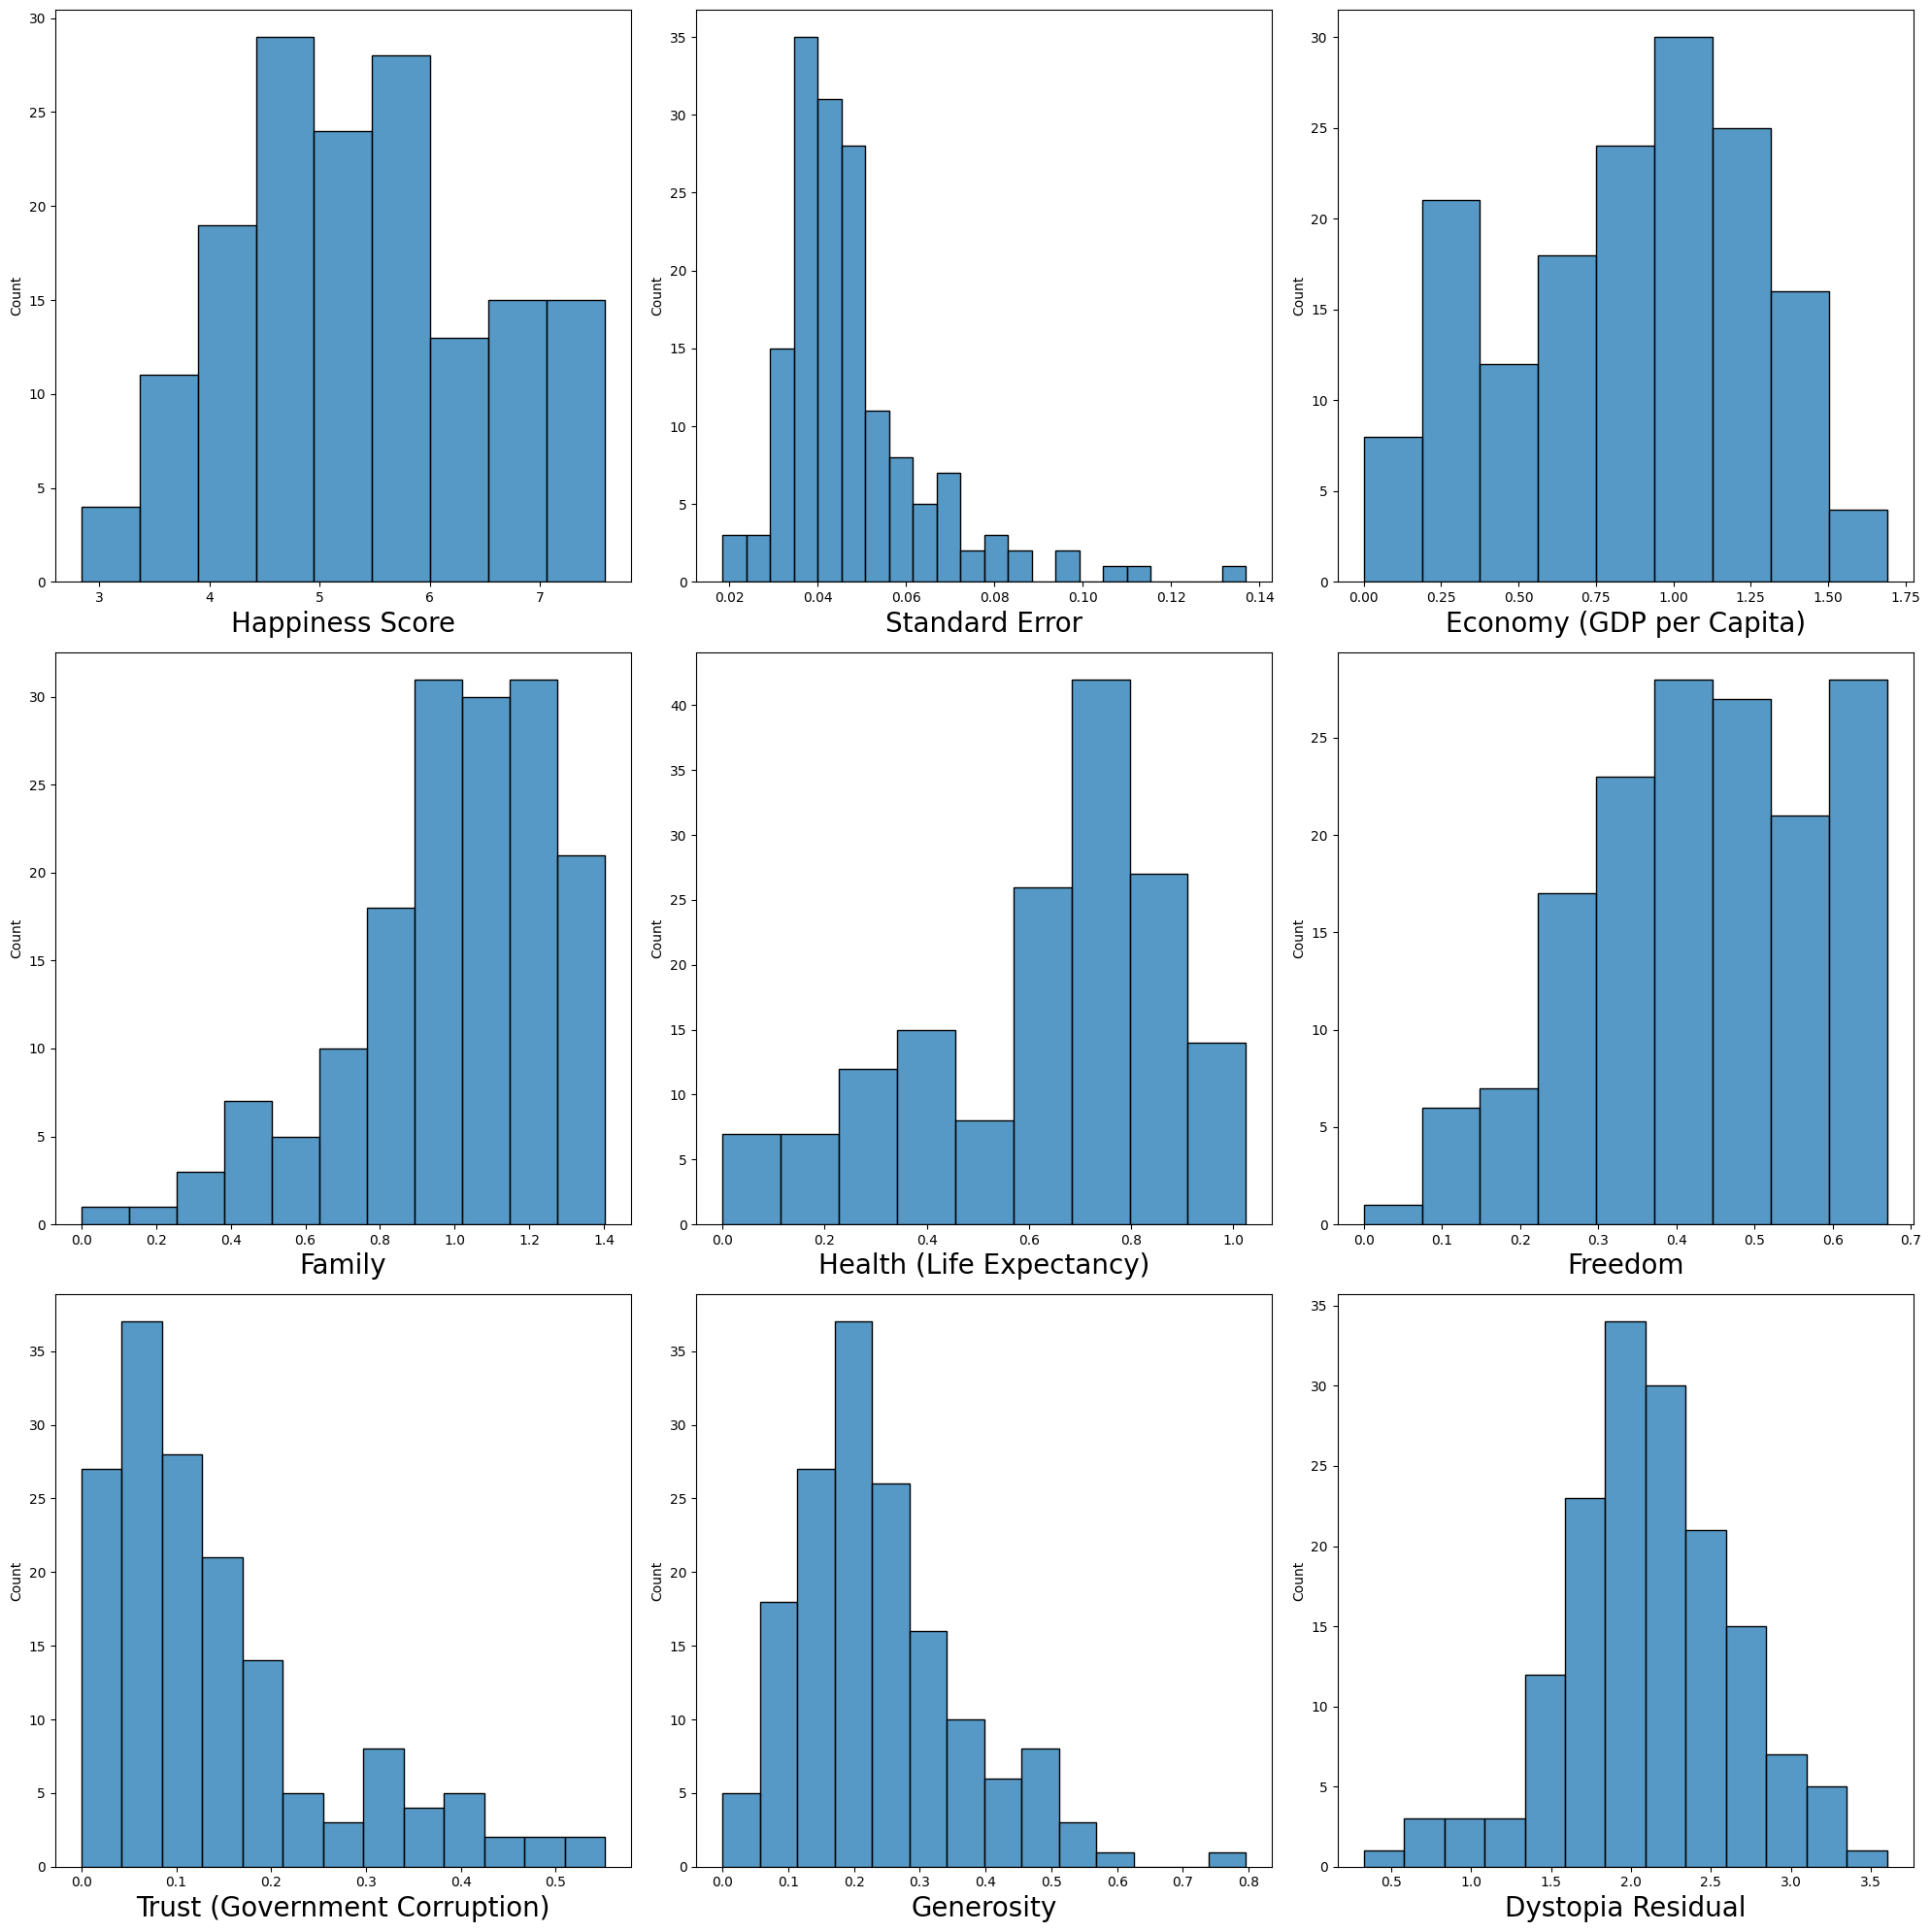

In [46]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in happiness_new:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(happiness_new[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Pair Plot

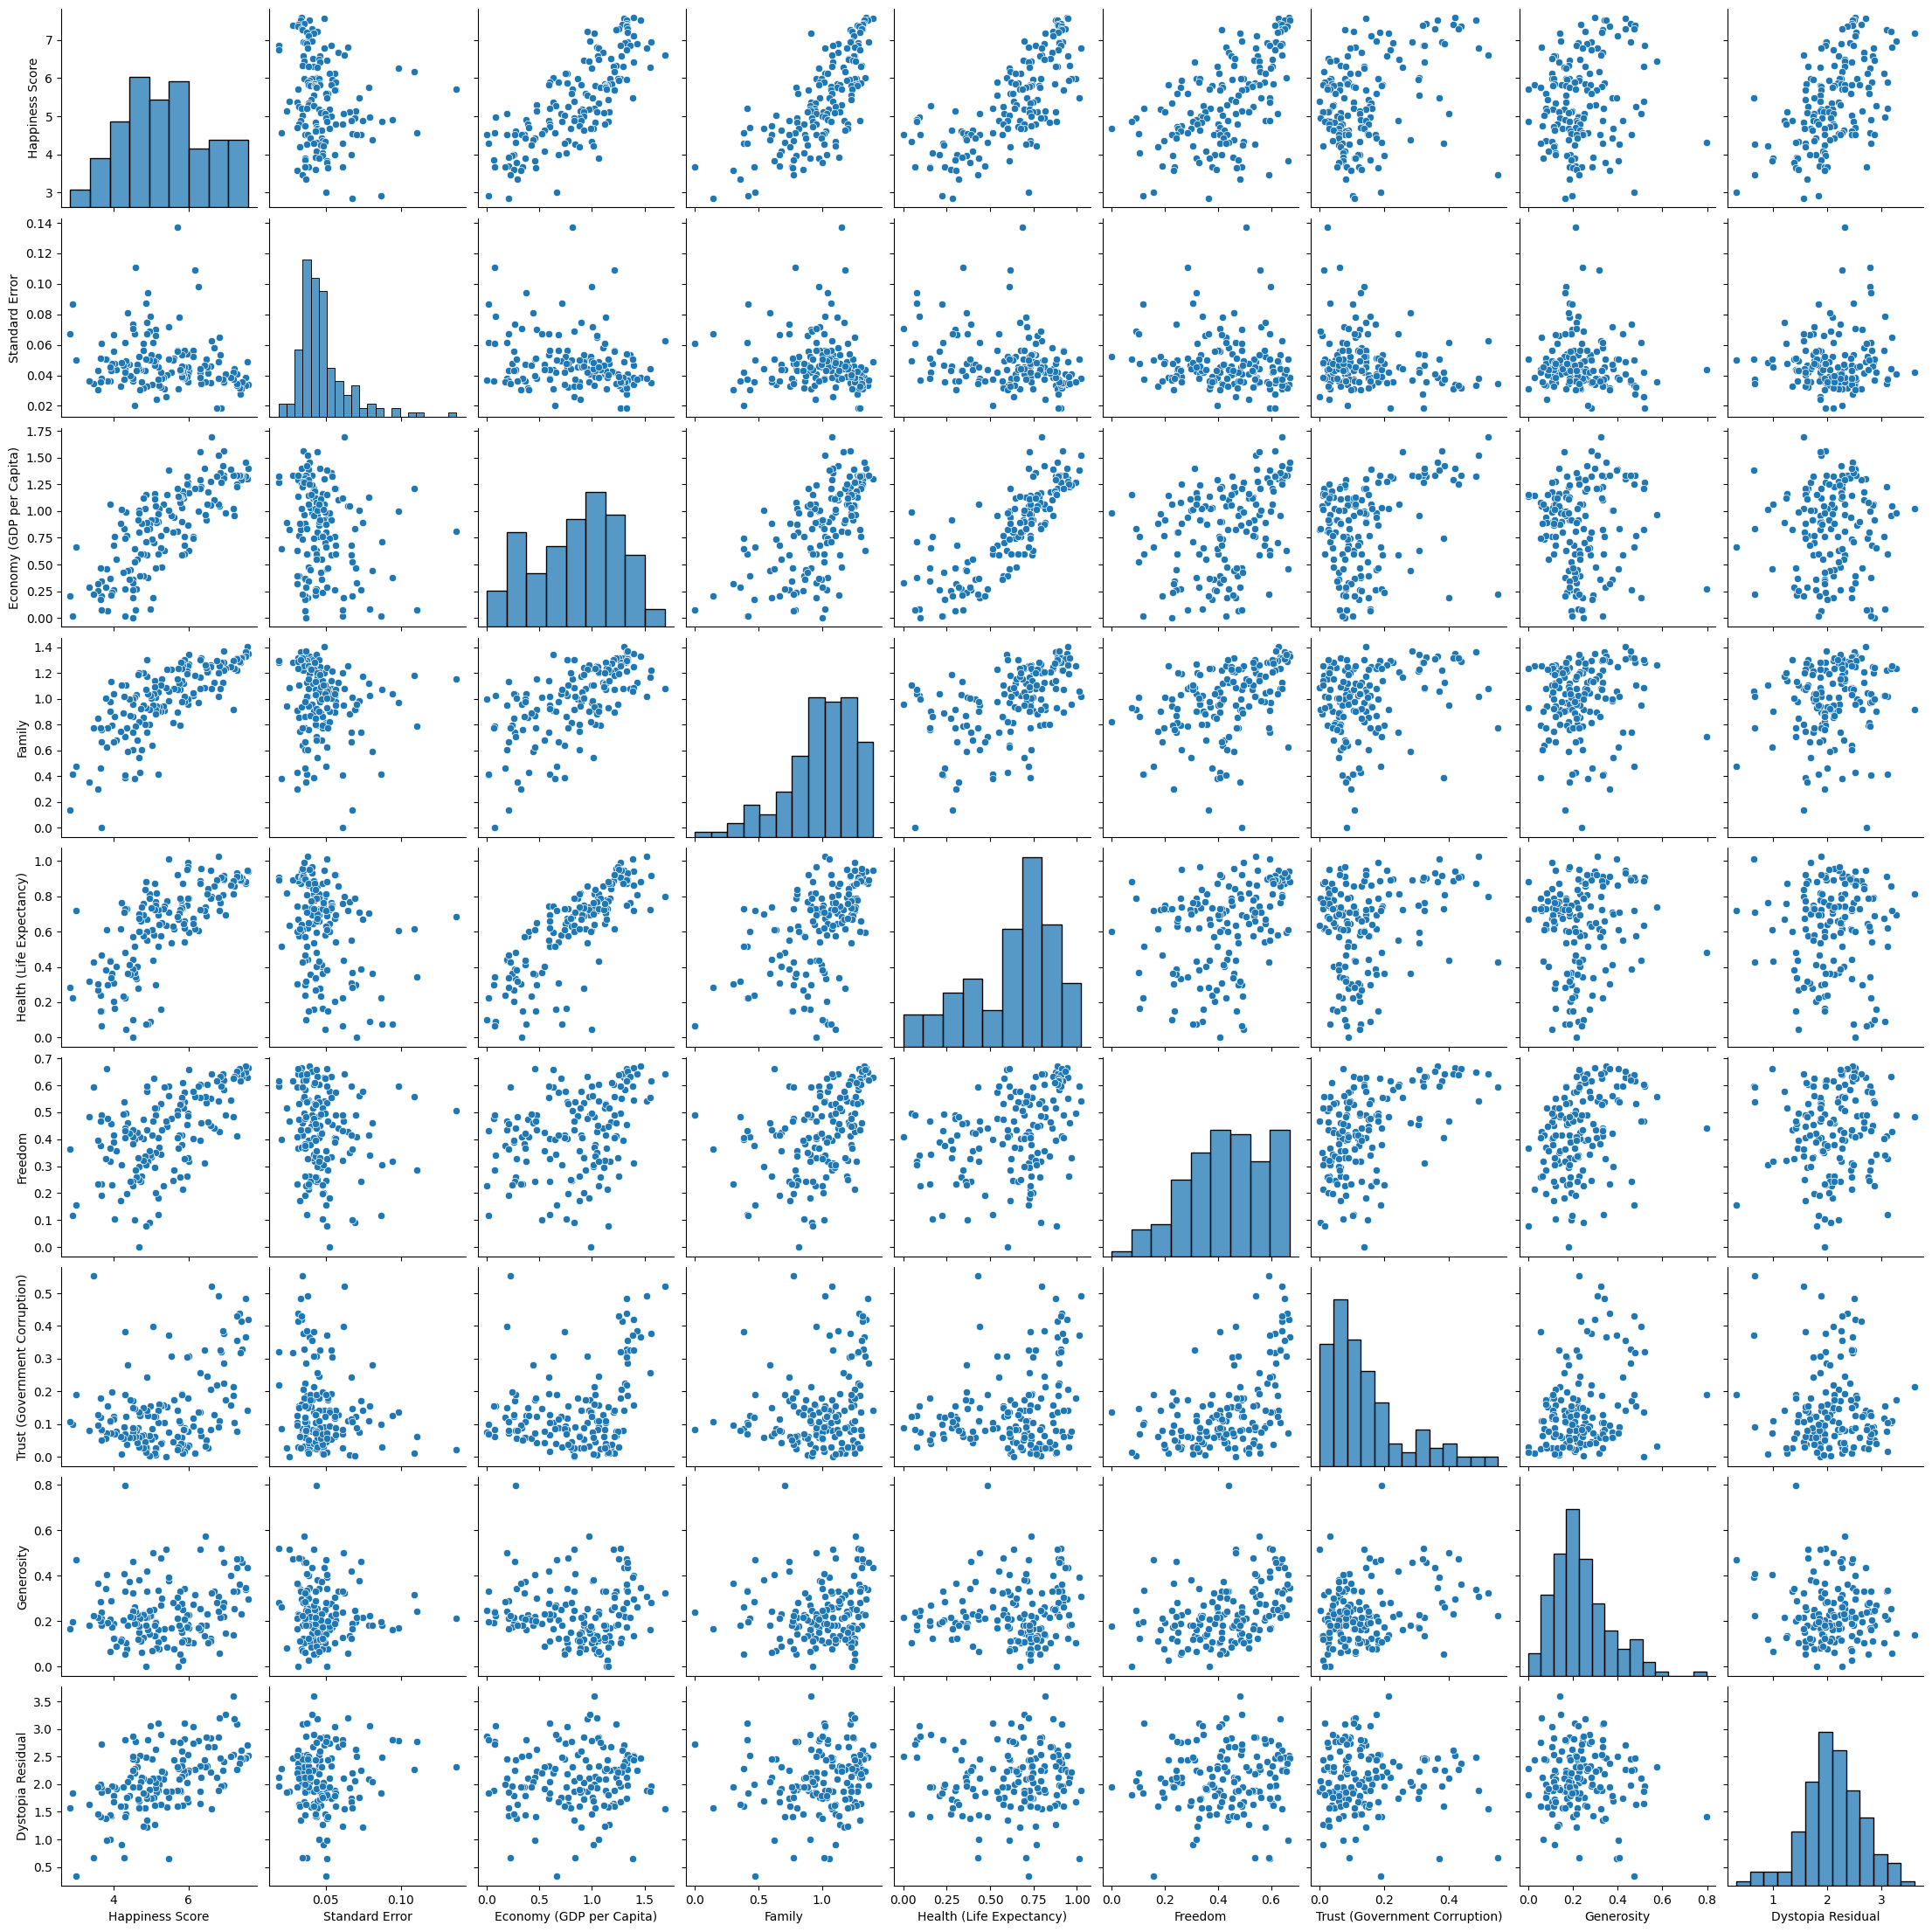

In [47]:
sns.pairplot(happiness_new , palette='viridis')

### Investingating Correlation between features

In [48]:
happiness.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.190675,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.210296,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.190675,-0.210296,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),-0.785267,0.780966,-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.052531,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

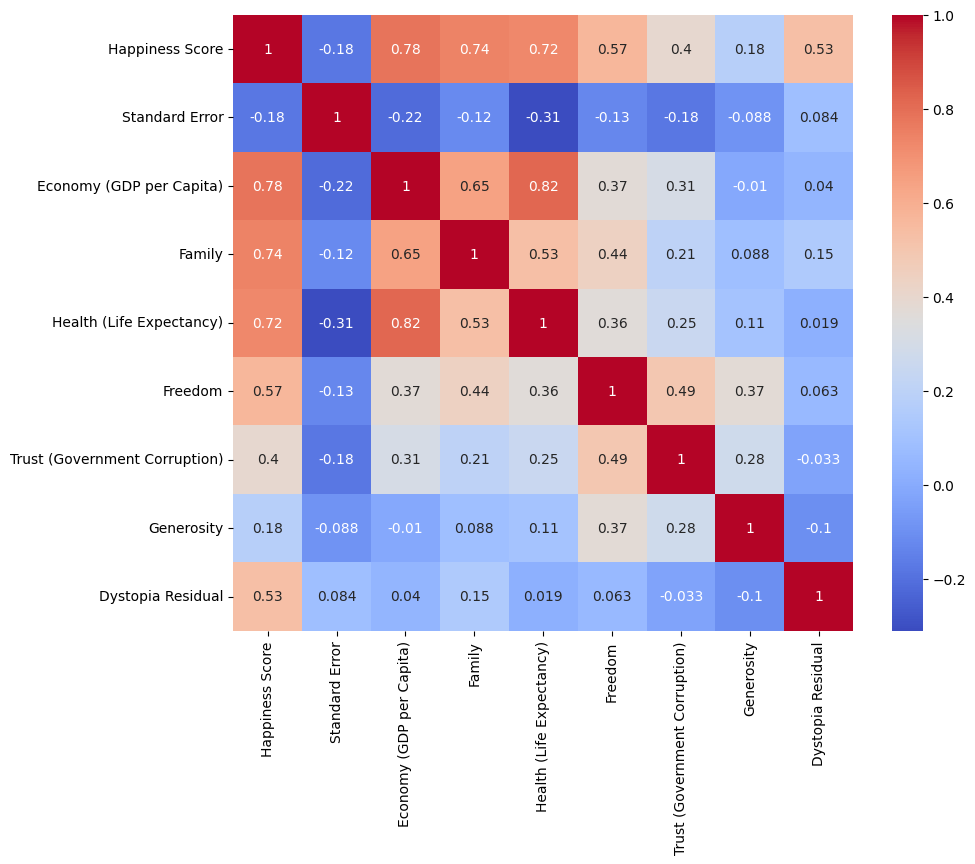

In [49]:
corr_df=happiness_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot= True, cmap='coolwarm')

### Top 10 countries happiest countries based on Happiness rank/score

In [50]:
a = happiness.sort_values(by='Happiness Score', ascending= False).head(10)
a

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,-3.460947,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,-3.575908,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,-3.455548,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,-3.389961,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,-3.198338,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can see that Switzerland Top the chart with Happiness score of 7.587. We can see that 8 countries out of 10 are from Western Europe

#### Bottom 10 countries happiest countries based on Happiness rank/score

In [51]:
b =happiness.sort_values(by='Happiness Score', ascending=True).head(10)
b

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,-2.699041,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,-3.327018,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,-3.262305,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


We can see that Chad from Sub-Saharan Africa. Top the chart with Happiness score of 3.667. We can see that 8 countries out of Bottom 10 are from Sub-Saharan Africa.

In [52]:
Grp_Region=happiness.groupby('Region')
Grp_Region['Happiness Score'].describe().sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


We can see REGIONWISE that "Australia and New Zealand" has maximum Happiness Score(7.2850) and "Sub-Saharan Africa" has minimum Happiness Score(4.2028).

So we can conclude that "Australia and New Zealand" is Happiest Region in world followed by 'North America' while 'Sub-Saharan Africa' has least Happiest Region in world. So we need to Examine what actually contribute to happiness and unhappiness of this particular region of world

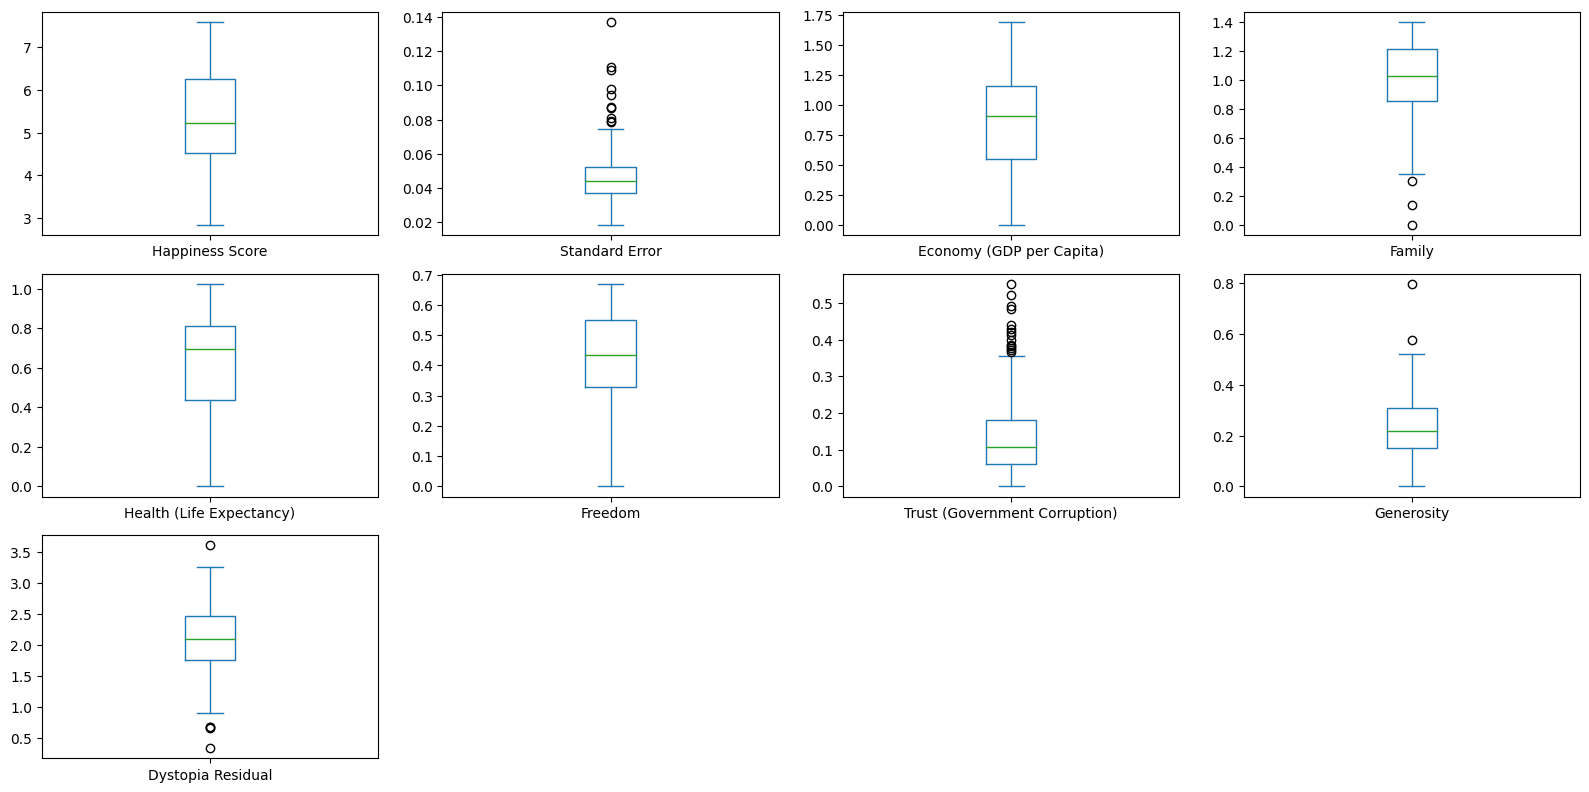

In [53]:
happiness_new.plot(kind ='box', subplots = True, layout=(3,4))

plt.tight_layout()

### Machine Learning Algorithm

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (105, 8)
Training target vector size: (105,)
Test feature matrix size: (53, 8)
Test target vector size: (53,)


### Finding Best Random state

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.999999955318454 on Random_state 148


### Linear Regression

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=148)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',Y_test)

Predicted result price:
 [4.19435462 4.51783157 6.8101893  5.01306089 4.50719926 4.27067703
 7.5270131  6.78615758 6.79779076 4.89757075 4.076767   6.75010255
 3.89660894 3.66726541 7.22558074 5.832712   5.98708888 4.85766282
 5.87825745 4.56464368 7.28598539 6.93731965 5.70878587 6.66962698
 6.29813718 2.83894048 3.68090087 5.05722719 3.34000395 3.67770984
 3.98885057 5.8282158  3.93080562 4.86720704 7.19975796 4.30691724
 7.18722252 3.00638777 7.27763061 4.8759534  6.26918541 5.47698043
 4.97110319 7.52214256 3.84497171 6.41123729 6.12268394 4.33217718
 4.9487715  4.67744738 5.75859498 6.98252597 5.39865551]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
15

### Linear Regression Evaluation Matrix

In [58]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.00023306649408825542
Mean squared error : 7.582563994815774e-08
Root Mean Squared Error: 0.00027536455826441744


 R2 Score :
0.999999955318454


## Applying other Regression Model

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [60]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.3982339622641507
Mean squared error : 0.26761819792452834
Root Mean Squared Error: 0.517318275266328


 R2 Score :
0.8423014321530887


 Error of  SVR() :
Mean absolute error : 0.13984156840268566
Mean squared error : 0.05213341416923219
Root Mean Squared Error: 0.22832742754481378


 R2 Score :
0.9692795003657549


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.4373584905660377
Mean squared error : 0.3047010566037736
Root Mean Squared Error: 0.5519973338737911


 R2 Score :
0.8204497279314066


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.44046951459123507
Mean squared error : 0.3231217378138531
Root Mean Squared Error: 0.5684379806222075


 R2 Score :
0.809595028706456




### "We can see that Linear Regression Model Gives us maximum R2 Score"

## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
Mean Score : 0.9999981871007761
Std deviation : 1.4991023001111373e-06


## Saving model

In [62]:
import joblib
joblib.dump(lin_reg,'linear_regression.obj')

['linear_regression.obj']